<a href="https://colab.research.google.com/github/fmarcelneves/HR-Analytics-Prediction/blob/main/IBM_HR_Analytics_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The problem
Employees are the backbone of any organization. Its performance is heavily based on the quality of the employees and the hability of retaining them. Regarding this issue, employee attrition is a gradual but deliberate reduction in the number of employees in a company or business organization. Employee atrrition generates a costly process to replace the workforce and the possible loss of talented and trained people. Thus, what are the reasons why an employee quits?

A survey made by Better works (https://blog.betterworks.com/people-analytics-reveals-top-reasons-for-attrition-and-it-isnt-compensation/) show a number of reasons (< 50%) of why employee quits, these are:

* Management (81%)
* Alignment and involvement (73%)
* Employee enablement (69%)
* Collaboration and teamwork (65%)
* Feedback and recognition (62%)
* Investment in people (57%)
* Compensation and benefits (53%)
<br><br>
In this notebook, we will focus on theses issues too prove the relationship between relation with the boss, bored and unchallenged, relationships with coworkers, salary, overtime and employee attrition.
<br><br>
Here we used the IBM's HR focused dataset of employee attrition and performance



# Objectives 
Our objetive is to predict turnover and find differences between the group that stayed or that left, especially comparing the most common reasosn of why employee quits (as listed above)


## Data definitions 
Below are some definitions for better understanding of the data: 
<br><br>
Education   
* 1 Below College
* 2 College
* 3 Bachelor
* 4 Master
* 5 Doctor

Environment Satisfaction, Job Involvement, Job Satisfaction & Relationship Satisfaction
* 1 Low
* 2 Medium
* 3 High
* 4 Very High

Performance Rating
* 1 Low
* 2 Good
* 3 Excellent
* 4 Outstanding

Work-Life Balance
* 1 Bad
* 2 Good
* 3 Better
* 4 Best
<br><br>

Meaning of some data categories: 

Daily rate = the amount of money you are paid per day.

Percent salary hike = the % change in salary from 2016 vs 2015.

Relationship satisfaction = how happy is the employee with her colleagues.

Stock option level = how much company stocks you own.

# Import packages 

In [449]:
%%capture
#import all required libraries
#Data Analysis
import pandas as pd
import numpy as np
#Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
!pip install plotly --upgrade
import plotly.express as px
#from plotly.subplots import make_subplots
import plotly.graph_objs as go
!pip install scikit-plot
#import plotly.figure_factory as ff
#from plotly import tools
#import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode
import plotly.io as pio
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
pio.templates.default = "plotly_white"
from collections import Counter
from sklearn.preprocessing import OneHotEncoder
# machine learning 
from imblearn.pipeline import Pipeline
#from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
import xgboost as xgb

In [450]:
from imblearn.pipeline import make_pipeline

In [451]:
Pipeline

imblearn.pipeline.Pipeline

In [452]:
make_pipeline

<function imblearn.pipeline.make_pipeline>

#  Data acquisition, basic description and initial exploration 

In [453]:
%%capture
!wget https://github.com/IBM/employee-attrition-aif360/raw/master/data/emp_attrition.csv --output-document=emp_attrition.csv

In [454]:
#You have to include the full link to the csv file containing your dataset
HR = pd.read_csv('emp_attrition.csv')

In [455]:
HR.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [456]:
# 35 features in total, each contains 1470 data points
HR.shape

(1470, 35)

In [457]:
#basic describition of the data
HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [458]:
#the dataset does not have null values
HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [459]:
HR.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [460]:
# Let's replace the columns 'Attrition' , 'overtime' and 'Over18' with integers before performing any visualizations 
HR['Attrition'] = HR['Attrition'].apply(lambda x:1 if x == 'Yes' else 0)
HR['OverTime'] = HR['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)
HR['Over18'] = HR['Over18'].apply(lambda x:1 if x == 'Y' else 0)

# Exploratory data analysis 

In [461]:
#current dataset 
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,1,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,1,0,12,3,4,80,1,6,3,3,2,2,2,2


In [462]:
#pd.options.plotting.backend = "matplotlib"

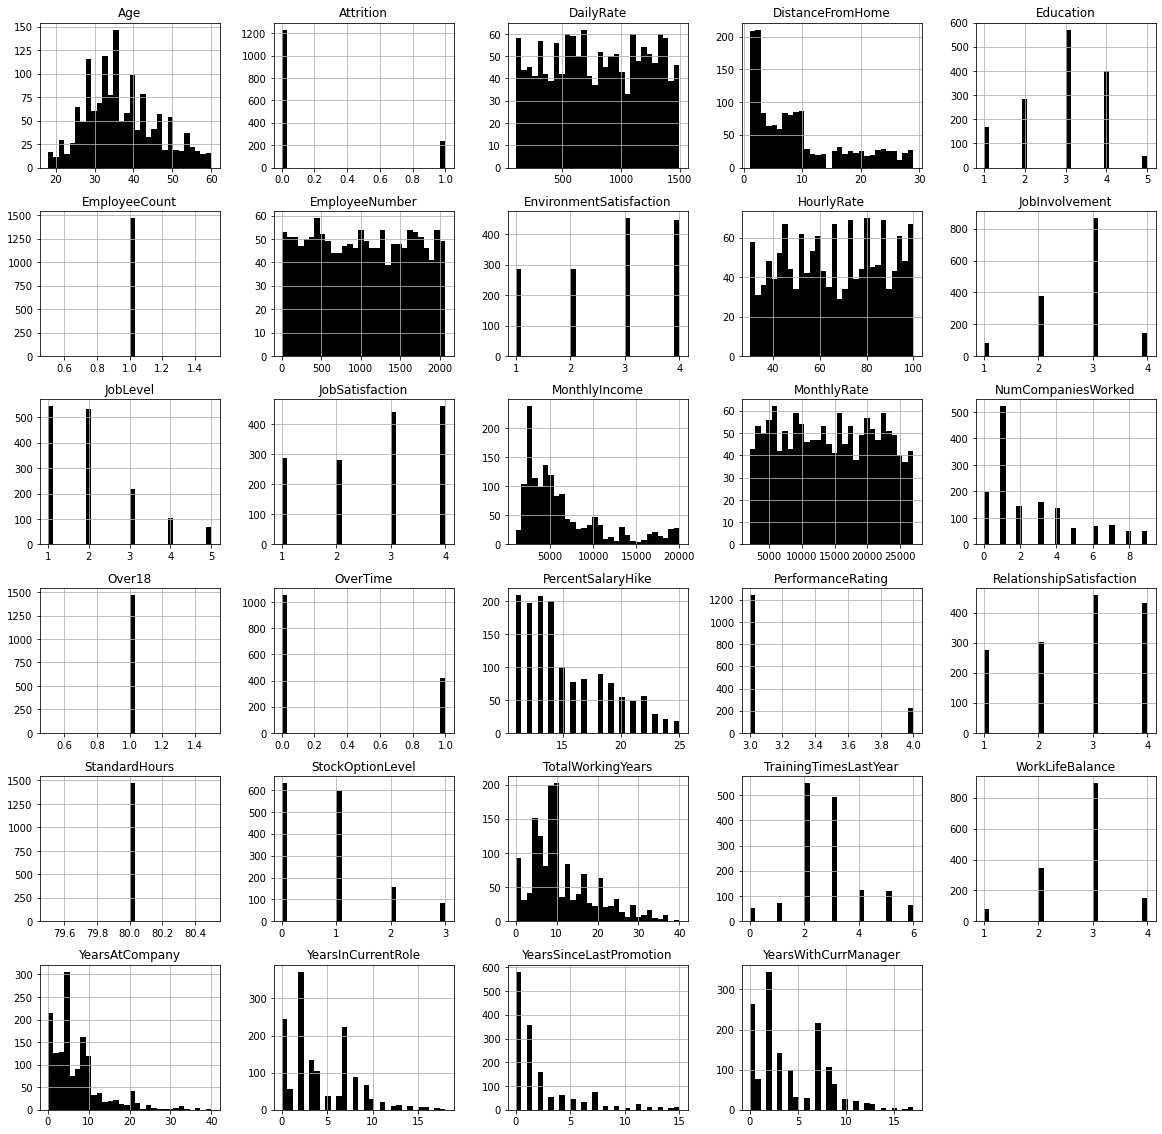

In [463]:
#Histograms of the data 
HR.hist(bins=30, figsize=(20, 20), color = 'black');
# Several features such as 'MonthlyIncome' and 'TotalWorkingYears' are tail heavy
# It makes sense to drop 'EmployeeCount' and 'Standardhours' since they do not change from one employee to the other

 It makes sense to drop 'EmployeeCount' , 'Standardhours' and 'Over18' since they do not change from one employee to the other

In [464]:
# Let's drop 'EmployeeNumber' as well
HR.drop(['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], axis = 1, inplace=True)

In [465]:
# Let's see how many employees left the company 
left_df = HR[HR['Attrition'] == 1]
stayed_df = HR[HR['Attrition']== 0] 

In [466]:
values = [20, 30]

In [467]:
def newLegend(fig, newNames):
    newLabels = []
    for item in newNames:
        for i, elem in enumerate(fig.data[0].labels):
            if elem == item:
                #fig.data[0].labels[i] = newNames[item]
                newLabels.append(newNames[item])
    fig.data[0].labels = np.array(newLabels)
    return(fig)

In [468]:
fig = px.histogram(HR, x="Attrition", title="Attrition", color = HR['Attrition'], barmode='group')
#fig=newLegend(fig, {0:"0 - No", 1:"1 - Yes"})
fig.show()

In [469]:
print('Number of employess who stayed =', len(stayed_df))
print('% of employess who stayed =',1.* len(stayed_df)/len(HR) * 100, '%')

Number of employess who stayed = 1233
% of employess who stayed = 83.87755102040816 %


In [470]:
# Count the number of employees who stayed and left
# It is an imbalanced dataset 
print('Number of employess who left =', len(left_df))
print('% of employess who left =',1.* len(left_df)/len(HR) * 100, '%')

Number of employess who left = 237
% of employess who left = 16.122448979591837 %


In [471]:
stayed_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
Attrition,1233.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0


In [472]:
left_df.describe().T
#  Let's compare the mean and std of the employees who stayed and left 
# 'age': mean age of the employees who stayed is higher compared to who left
# 'DailyRate': Rate of employees who stayed is higher
# 'DistanceFromHome': Employees who stayed live closer to home 
# 'EnvironmentSatisfaction' & 'JobSatisfaction': Employees who stayed are generally more satisifed with their jobs
# 'StockOptionLevel': Employees who stayed tend to have higher stock option level

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
Attrition,237.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0


In [473]:
HR.corr

<bound method DataFrame.corr of       Age  Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41          1  ...                       0                     5
1      49          0  ...                       1                     7
2      37          1  ...                       0                     0
3      33          0  ...                       3                     0
4      27          0  ...                       2                     2
...   ...        ...  ...                     ...                   ...
1465   36          0  ...                       0                     3
1466   39          0  ...                       1                     7
1467   27          0  ...                       0                     3
1468   49          0  ...                       0                     8
1469   34          0  ...                       1                     2

[1470 rows x 31 columns]>

In [474]:
correlations = HR.corr(method= 'spearman')
fig = px.imshow(correlations, labels=dict(color="Correlation"), title="Correlation between numerical variables")
fig.update_layout(width=700, height=700)
fig.show()
# Job level is strongly correlated with monthly income and total working years 
# Year in current role is strongly correlated with years at company and years with current manager

A short analysis reveals the following key points:

---

For people who leave the company (on average):

* They are younger: 33 years
* They live further from their work: 11km
* Less satisfaction with the work environment: 2 (Medium) 
* Lower level of work: 1 ()
* Less satisfaction with work: 2 (Medium)
* Lower monthly salary: $ 4800.00
* Work more overtime: 0.5
* Less years in the company: 5
* Fewer years in current position: 2
* Fewer years with current manager: 2.8

## 1.1 Relationship with the Boss (Management)

In [475]:
fig = px.box(HR, x="YearsWithCurrManager", color="Attrition", labels={'YearsWithCurrManager': 'Years with the Current Manager'}, 
             title='Boxplots of people spending years with a Manager in an Organization')
fig.show()

In [476]:
HR_man_count=HR.groupby(['YearsWithCurrManager','Attrition']).apply(lambda x:x['YearsWithCurrManager'].count()).reset_index(name='Counts')
fig = px.line(HR_man_count,x='YearsWithCurrManager',y='Counts',color='Attrition',title='Count of people spending years with a Manager in an Organization',
              labels={'YearsWithCurrManager': 'Years with the Current Manager'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

## 1.2 Alignment and Involvement

In [477]:
fig= px.histogram(HR, x="JobInvolvement", title="Atrittion vs Job Involvement", color=HR['Attrition'], barmode='group', histnorm='percent', labels={'JobInvolvement': 'Job Involvement'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [478]:
fig= px.histogram(HR, x="JobSatisfaction", title= "Atrittion vs Job Satisfaction", color=HR['Attrition'], barmode='group', histnorm='percent', 
                  labels={'JobSatisfaction': 'Job Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [479]:
fig= px.histogram(HR, x="PerformanceRating", title="Atrittion vs Performance Rating", color=HR['Attrition'], barmode='group', histnorm='percent',
                  labels={'PerformanceRating': 'Performance Rating'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [3, 4],
        ticktext = ['Excellent', 'Outstanding']
        )
)
fig.show()

In [480]:
fig= px.histogram(HR, x="JobLevel", title= "Atrittion vs Job Level", color=HR['Attrition'], marginal="box", barmode='group',  histnorm='percent', 
                  labels={'JobLevel': 'Job Level'})
fig.show()

In [481]:
HR_years_count=HR.groupby(['YearsInCurrentRole','Attrition']).apply(lambda x:x['YearsInCurrentRole'].count()).reset_index(name='Counts')
fig = px.line(HR_years_count,x='YearsInCurrentRole',y='Counts',color='Attrition',title='Count of years in current role',
              labels={'YearsInCurrentRole': 'Years In Current Role'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [482]:
px.treemap(HR, path=["JobRole"], color='Attrition', color_continuous_scale="Bluered_r")

## 1.3 Employee enablement, investment and recognition

In [483]:
fig= px.histogram(HR, x="WorkLifeBalance", title="Atrittion vs Work-Life Balance", color=HR['Attrition'], barmode='group', histnorm='percent',
                  labels={'WorkLifeBalance': 'Work Life Balance'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Bad', 'Good', 'Better', 'Best']
        )
)
fig.show()

* Management (81%)
* Alignment and involvement (73%)
* Employee enablement (69%)
* Collaboration and teamwork (65%)
* Feedback and recognition (62%)
* Investment in people (57%)
* Compensation and benefits (53%)

In [484]:
fig= px.histogram(HR, x="TrainingTimesLastYear", title= "Atrittion vs Training Times Last Year", color=HR['Attrition'], barmode='relative', 
                   histnorm= 'percent', labels={'TrainingTimesLastYear': 'Training Times Last Year'})
fig.show()

In [485]:
HR_man_count=HR.groupby(['YearsSinceLastPromotion','Attrition']).apply(lambda x:x['YearsSinceLastPromotion'].count()).reset_index(name='Counts')
fig = px.line(HR_man_count,x='YearsSinceLastPromotion',y='Counts',color='Attrition',title='Count of years since last promotion',
              labels={'YearsSinceLastPromotion': 'Years Since Last Promotion'}, color_discrete_sequence=["red", "blue"])
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [486]:
fig = px.box(HR,x='YearsSinceLastPromotion',color='Attrition',title='Boxplots of Years Since Last Promotion',
              labels={'YearsSinceLastPromotion': 'Years Since Last Promotion'})
fig.show()

In [487]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


In [488]:
job_overtime = HR.groupby(["OverTime", "Attrition"]).agg(count_col=pd.NamedAgg(column="Attrition", aggfunc="count")).reset_index()
fig = px.histogram(job_overtime, x="OverTime", y = 'count_col' ,color="Attrition",  histnorm='percent', color_discrete_sequence=["red", "blue"])
fig.update_layout(barmode='group', legend_traceorder="reversed",
                 xaxis = dict(
        tickmode = 'array',
        tickvals = [0,  1],
        ticktext = ['No', 'Yes']
        ) 
)
fig.show()

In [489]:
HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


## 1.4 Collaboration and teamwork

In [490]:
fig= px.histogram(HR, x="RelationshipSatisfaction", title= "Atrittion vs Relationship Satisfaction", color=HR['Attrition'], histnorm='percent', barmode='group', 
                  labels={'RelationshipSatisfaction': 'Relationship Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()

In [491]:
env_satis=HR.groupby(['EnvironmentSatisfaction','Attrition']).apply(lambda x:x['EnvironmentSatisfaction'].count()).reset_index(name='Counts')
fig = px.area(env_satis,x='EnvironmentSatisfaction',y='Counts',color='Attrition',title='Environment Satisfaction level of the People in the Organization', labels={'EnvironmentSatisfaction': 'Environment Satisfaction'})
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [1, 2, 3, 4],
        ticktext = ['Low', 'Medium', 'High', 'Very High']
        )
)
fig.show()


## 1.5 Compensation and benefits

In [492]:
fig = px.box(HR, x = 'Attrition', y = 'MonthlyIncome', color = 'Attrition', labels={'MonthlyIncome': 'Monthly Income'})
fig.update_layout(title = 'Monthly income')
fig.show()

In [493]:
fig= px.box(HR, x="MonthlyIncome", y='JobRole', title="Job Role vs Monthly Income", color='Attrition', labels={'MonthlyIncome': 'Monthly Income'})
fig.show()

In [494]:
hike_att=HR.groupby(['PercentSalaryHike','Attrition']).apply(lambda x:x['DailyRate'].count()).reset_index(name='Counts')
px.line(hike_att,x='PercentSalaryHike',y='Counts',color='Attrition',title='Count of Hike Percentages people receive in an Organization', 
        labels={'PercentSalaryHike': 'Percent Salary Hike'})

## 1.6 Personal factors

In [495]:
fig=px.histogram(HR, x= 'Age', title="Atrittion vs Age", color = HR['Attrition'], marginal="box")
fig.show() 

In [496]:
fig= px.box(HR, x="MonthlyIncome", y='JobRole', title="Job Role vs Monthly Income", color=HR['Gender'], labels={'JobRole': 'Job Role', 'MonthlyIncome': 'Monthly Income'})
fig.show()

In [497]:
fig= px.histogram(HR, x="MaritalStatus", title="Atrittion vs Marital Status", color=HR['Attrition'], barmode='group', labels= {'MaritalStatus': 'Marital Status'})
fig.show()

In [498]:
fig= px.histogram(HR, x="Gender", title="Atrittion vs Gender", color=HR['Attrition'], barmode='group')
fig.show()

In [499]:
fig= px.histogram(HR, x="Age", title="Atrittion vs Age", color=HR['Attrition'], marginal='box')
fig.show()

In [500]:
fig= px.histogram(HR, x="TotalWorkingYears", title="Atrittion vs Total Working Years", color=HR['Attrition'], marginal='box', labels= {'TotalWorkingYears': 'Total Working Years'})
fig.show()

In [501]:
fig = px.box(HR,x='DistanceFromHome',color='Attrition',title='Boxplots of Distance From Home',
              labels={'DistanceFromHome': 'Distance From Home'})
fig.show()

In [502]:
fig = px.parallel_categories(HR, dimensions= ['EducationField', 'JobRole', 'Attrition'],  color=HR['Education'])
fig.show()

# Data cleaning, final feature selection and preparation for the model

In [503]:
HR.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


In [504]:
#X_categorical and ordinal with not too much values/definition
X_cat = HR[['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']]
X_cat.head()

,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,PerformanceRating,RelationshipSatisfaction,WorkLifeBalance
0,Travel_Rarely,Sales,2,Life Sciences,2,3,2,Sales Executive,4,Single,3,1,1
1,Travel_Frequently,Research & Development,1,Life Sciences,3,2,2,Research Scientist,2,Married,4,4,3
2,Travel_Rarely,Research & Development,2,Other,4,2,1,Laboratory Technician,3,Single,3,2,3
3,Travel_Frequently,Research & Development,4,Life Sciences,4,3,1,Research Scientist,3,Married,3,3,3
4,Travel_Rarely,Research & Development,1,Medical,1,3,1,Laboratory Technician,2,Married,3,4,3


In [506]:
X_cat = pd.get_dummies(X_cat, columns=['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance'])
X_cat.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [507]:
X_cat.shape

(1470, 56)

In [ ]:
#X_cat = pd.DataFrame(X_cat)

About DailyRate, HourlyRate and MonthlyRate
<br><br>
* From Sunix Liu (Kaggle User): Monthly rate is the internal charge out rate which will be used to calculate the cost of each employee monthly, in general, the monthly rate will cover salary, social insurance, administration, logistics, over head etc.
HourlyRate and DailyRate. These are not considered because the Standart Hours for every employee are 80 hours.
* I decided to drop these three variables and keep only with "MonthlyIncome" that is the total salary.

In [508]:
#I turned gender categorical into numeric bynary 
HR['Gender'] = HR['Gender'].replace({'Female':0,'Male': 1})

In [510]:
# X_numerical
X_numerical = HR[['Age', 'Gender', 'DailyRate', 'DistanceFromHome',	'MonthlyIncome',	'NumCompaniesWorked',	'PercentSalaryHike',	'TotalWorkingYears','TrainingTimesLastYear', 'StockOptionLevel', 'OverTime','YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager', 'YearsAtCompany']]
X_numerical.head()

,Age,Gender,DailyRate,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,StockOptionLevel,OverTime,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany
0,41,0,1102,1,5993,8,11,8,0,0,1,4,0,5,6
1,49,1,279,8,5130,1,23,10,3,1,0,7,1,7,10
2,37,1,1373,2,2090,6,15,7,3,0,1,0,0,0,0
3,33,0,1392,3,2909,1,11,8,3,0,1,7,3,0,8
4,27,1,591,2,3468,9,12,6,3,1,0,2,2,2,2


In [511]:
X = pd.concat([X_numerical, X_cat], axis = 1)
X.head()

,Age,Gender,DailyRate,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,StockOptionLevel,OverTime,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearsAtCompany,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobLevel_1,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,0,1102,1,5993,8,11,8,0,0,1,4,0,5,6,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,0,0
1,49,1,279,8,5130,1,23,10,3,1,0,7,1,7,10,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,2090,6,15,7,3,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0
3,33,0,1392,3,2909,1,11,8,3,0,1,7,3,0,8,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0
4,27,1,591,2,3468,9,12,6,3,1,0,2,2,2,2,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0


In [512]:
y = HR['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [513]:
X.shape

(1470, 71)

In [515]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)

In [541]:
from sklearn.feature_selection import chi2, mutual_info_classif, f_classif, SelectKBest

In [552]:
#Observar a importância dos features de acordo com as k highest scores
k = X_train.shape[1]
best_features = SelectKBest(score_func = chi2, k = k)
fit = best_features.fit(X_train, y_train)
scores = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_train.columns)

featureScores = pd.concat([features, scores], axis = 1)
featureScores.columns = ["Feature", "Score"]
# Print features ordered by score
print(featureScores.nlargest(k, "Score"))

                       Feature         Score
4                MonthlyIncome  82083.090964
2                    DailyRate    905.084909
7            TotalWorkingYears    167.233431
14              YearsAtCompany    106.691766
11          YearsInCurrentRole     73.753067
..                         ...           ...
21                 Education_1      0.106764
33   EnvironmentSatisfaction_2      0.104501
65  RelationshipSatisfaction_3      0.001415
62         PerformanceRating_4      0.000184
61         PerformanceRating_3      0.000032

[71 rows x 2 columns]


In [533]:
px.histogram(featureScores, x= 'Feature', y = 'Score').update_xaxes(categoryorder="total descending")

In [569]:
#Observar a importância dos features de acordo com as k highest scores
k = X_train.shape[1]
best_features = SelectKBest(k = k)
fit = best_features.fit(X_train, y_train)
scores = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_train.columns)

featureScores = pd.concat([features, scores], axis = 1)
featureScores.columns = ["Feature", "Score"]
# Print features ordered by score
print(featureScores.nlargest(k, "Score"))

                       Feature      Score
10                    OverTime  53.458837
40                  JobLevel_1  45.046865
60        MaritalStatus_Single  36.675071
0                          Age  33.120343
7            TotalWorkingYears  32.945515
..                         ...        ...
33   EnvironmentSatisfaction_2   0.130200
21                 Education_1   0.121286
65  RelationshipSatisfaction_3   0.002028
62         PerformanceRating_4   0.000216
61         PerformanceRating_3   0.000216

[71 rows x 2 columns]


In [571]:
px.histogram(featureScores, x= 'Feature', y = 'Score').update_xaxes(categoryorder="total descending")

StratifiedKFold 

In [514]:
SKF= StratifiedKFold(n_splits=5, shuffle=True, random_state= 42)

In [520]:
from sklearn.decomposition import TruncatedSVD

# Machine learning models 

## Random Forest

In [616]:
RF_pipe = Pipeline([     
 ('norm', StandardScaler()),  
 ('selection_feature', SelectKBest(k=10)),
 ('clf', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
])

In [617]:
predictions_RF = cross_val_predict(RF_pipe, X, y, cv = SKF)

In [618]:
print(classification_report(y, predictions_RF))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1233
           1       0.56      0.25      0.35       237

    accuracy                           0.85      1470
   macro avg       0.72      0.61      0.63      1470
weighted avg       0.82      0.85      0.82      1470



## Logistic regression

In [ ]:
from sklearn.decomposition import PCA

In [715]:
LR_pipe = Pipeline([ 
 ('selection_feature', SelectKBest(k=50)),                   
 ('norm', StandardScaler()),   
 ('clf', LogisticRegression(random_state=42, max_iter=500, solver='liblinear', class_weight='balanced'))
])

In [716]:
predictions_LR = cross_val_predict(LR_pipe, X, y, cv = SKF)

In [717]:
print(classification_report(y, predictions_LR))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1233
           1       0.40      0.75      0.52       237

    accuracy                           0.78      1470
   macro avg       0.67      0.76      0.69      1470
weighted avg       0.85      0.78      0.80      1470



##Ada Boost

In [712]:
ADA_pipe = Pipeline([ 
 ('selection_feature', SelectKBest(k=50)),
 ('norm', StandardScaler()),                        
 ('clf', AdaBoostClassifier(random_state=42))
])

In [713]:
predictions_ADA = cross_val_predict(ADA_pipe, X, y, cv = SKF)

In [714]:
print(classification_report(y, predictions_ADA))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1233
           1       0.64      0.40      0.49       237

    accuracy                           0.87      1470
   macro avg       0.77      0.68      0.71      1470
weighted avg       0.85      0.87      0.85      1470



## SVC

In [709]:
SVC_pipe = Pipeline([ 
 ('selection_feature', SelectKBest(k=50)),
 ('norm', StandardScaler()),                        
 ('clf', SVC(class_weight='balanced', random_state=42))
])

In [710]:
predictions_SVC = cross_val_predict(SVC_pipe, X, y, cv = SKF)

In [711]:
print(classification_report(y, predictions_SVC))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1233
           1       0.50      0.59      0.54       237

    accuracy                           0.84      1470
   macro avg       0.71      0.74      0.72      1470
weighted avg       0.85      0.84      0.84      1470



## XGB Boost

In [650]:
counter = Counter(y)
# estimate scale_pos_weight value
estimate = counter[0] / counter[1]
print('Estimate: %.3f' % estimate)

Estimate: 5.203


In [670]:
XGB_pipe = Pipeline([ 
 ('norm', StandardScaler()),                        
 ('selection_feature', SelectKBest(k=50)),
 ('clf', xgb.XGBClassifier(n_jobs=-1, nthread=-1, scale_pos_weight=5.203, random_state=42))
])

In [671]:
predictions_XGB = cross_val_predict(XGB_pipe, X, y, cv = SKF)

In [672]:
print(classification_report(y, predictions_XGB))

              precision    recall  f1-score   support

           0       0.91      0.86      0.89      1233
           1       0.45      0.57      0.50       237

    accuracy                           0.82      1470
   macro avg       0.68      0.72      0.69      1470
weighted avg       0.84      0.82      0.83      1470



## MLP Classifier 

In [706]:
MLP_pipe = Pipeline([    
 ('selection_feature', SelectKBest(k=50)),                     
 ('norm', StandardScaler()),  
 ('clf', MLPClassifier(hidden_layer_sizes= (17, 4), random_state=42, 
                          max_iter=1000, activation = 'identity',
                          early_stopping=True))
])

In [707]:
predictions_MLP = cross_val_predict(MLP_pipe, X, y, cv = SKF)

In [708]:
print(classification_report(y, predictions_MLP))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1233
           1       0.65      0.50      0.56       237

    accuracy                           0.88      1470
   macro avg       0.78      0.72      0.75      1470
weighted avg       0.87      0.88      0.87      1470



### Graph - neural network 

In [ ]:
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='grey')
                ax.add_artist(line)

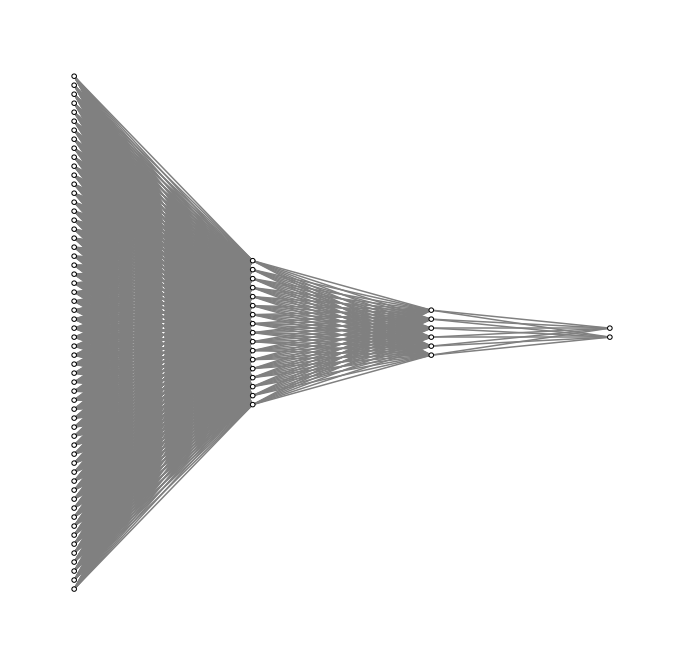

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [58,17,6,2])
fig.show()

# Model tuning 

Comparing the models, the MLP classifer appear to be the most promising models, so lets apply to it the tuning of the hyperparameters and after that, both the tuning and SMOTE together

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, stratify=y, random_state=42)

##MLP tuning

##### MLP Classifier with RandomizedSearch

In [718]:
MLP_pipe = Pipeline([  
 ('selection_feature', SelectKBest(k=50)),   
 ('norm', StandardScaler()),  
 ('clf', MLPClassifier(hidden_layer_sizes= (17, 4), random_state=42, 
                          max_iter=1000, activation = 'identity',
                          early_stopping=True))
])

In [719]:
MLP_param_grid = {
    'clf__activation': ['identity', 'logistic', 'tanh', 'relu'],
    'clf__solver': ['sgd', 'adam', 'lbfgs'],
    'clf__alpha': [0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05],
    'clf__learning_rate': ['constant', 'invscaling', 'adaptive'],
}

In [722]:
grid_MLP = RandomizedSearchCV(estimator=MLP_pipe, param_distributions=MLP_param_grid, 
                        scoring='f1_macro', cv=SKF, verbose=1, n_jobs=-1, n_iter=45)

In [723]:
grid_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   29.8s
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed:   33.7s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('selection_feature',
                                              SelectKBest(k=50,
                                                          score_func=<function f_classif at 0x7fea85736cb0>)),
                                             ('norm',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('clf',
                                              MLPClassifier(activation='identity',
                                                            alpha=0.0001,
                                                            batch_size...
                   iid='

In [724]:
print("Best: %f using %s" % (grid_MLP.best_score_, grid_MLP.best_params_))

Best: 0.742756 using {'clf__solver': 'lbfgs', 'clf__learning_rate': 'constant', 'clf__alpha': 0.001, 'clf__activation': 'identity'}


In [725]:
predictions_MLP = grid_MLP.predict(X_test)

In [726]:
print(classification_report(y_test, predictions_MLP))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       432
           1       0.70      0.45      0.54        83

    accuracy                           0.88       515
   macro avg       0.80      0.70      0.74       515
weighted avg       0.87      0.88      0.87       515



#### MLP with SMOTE

In [727]:
from imblearn.under_sampling import RandomUnderSampler

In [728]:
SMOTE_MLP_pipe = Pipeline([ 
 ('selection_feature', SelectKBest(k=50)),                           
 ('norm', StandardScaler()),
 ('SMOTE', SMOTE(random_state=42)),                     
 ('clf', MLPClassifier(hidden_layer_sizes= (17, 6), random_state=42, 
                       max_iter=1000, activation = 'identity',
                       early_stopping=True))
])

In [729]:
grid_MLP = RandomizedSearchCV(estimator=SMOTE_MLP_pipe, param_distributions=MLP_param_grid, 
                        scoring='f1_macro', cv=SKF, verbose=1, n_jobs=-1, n_iter=40)

In [731]:
grid_MLP.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   39.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   40.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.



RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('selection_feature',
                                              SelectKBest(k=50,
                                                          score_func=<function f_classif at 0x7fea85736cb0>)),
                                             ('norm',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('SMOTE',
                                              SMOTE(k_neighbors=5,
                                                    kind='deprecated',
                                                    m_neighbors='deprec...
                   iid='deprecated', n_i

In [732]:
print("Best: %f using %s" % (grid_MLP.best_score_, grid_MLP.best_params_))

Best: 0.691097 using {'clf__solver': 'lbfgs', 'clf__learning_rate': 'invscaling', 'clf__alpha': 0.03, 'clf__activation': 'identity'}


In [733]:
predictions_MLP = grid_MLP.predict(X_test)

In [734]:
print(classification_report(y_test, predictions_MLP))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88       432
           1       0.43      0.69      0.53        83

    accuracy                           0.80       515
   macro avg       0.68      0.76      0.70       515
weighted avg       0.85      0.80      0.82       515



## MLP from Keras and Tensorflow

In [746]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras 
from tensorflow.keras import layers

In [747]:
def MLPClassifier_Keras():
    model = keras.Sequential([
        layers.Dense(17, activation='linear', input_shape=(50,)), 
        layers.Dense(6, activation='linear'),
        layers.Dense(2, activation='sigmoid')
    ])
    #optimizer
    optimizer = tf.keras.optimizers.Adam()
    #compile model 
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics = ['accuracy'])
    return model

In [748]:
model_Keras = KerasClassifier(build_fn=MLPClassifier_Keras, epochs=100, batch_size=32, verbose=1)

In [749]:
MLP_pipe_Keras = Pipeline([  
 ('selection_feature', SelectKBest(k=50)),     
 ('norm', StandardScaler()),  
 ('clf', model_Keras)
])

In [750]:
predictions_MLP_Keras = cross_val_predict(MLP_pipe_Keras, X, y, cv = SKF)

Epoch 1/100
37/37 [==============================] - 0s 1ms/step - loss: 1.3237 - accuracy: 0.5668
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6894 - accuracy: 0.6584
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.7951
Epoch 4/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3875 - accuracy: 0.8608
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3343 - accuracy: 0.8974
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8757
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3102 - accuracy: 0.8949
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2814 - accuracy: 0.8950
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2956 - accuracy: 0.9060
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2847 - accuracy: 0.8988
Epoch 11/

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



37/37 [==============================] - 0s 1ms/step - loss: 1.5458 - accuracy: 0.5081
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.8295 - accuracy: 0.6352
Epoch 3/100
37/37 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.7952
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3587 - accuracy: 0.8651
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3045 - accuracy: 0.8987
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3064 - accuracy: 0.8943
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8825
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2774 - accuracy: 0.9032
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.9043
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3077 - accuracy: 0.8825
Epoch 11/100
37/37 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



37/37 [==============================] - 0s 2ms/step - loss: 0.9838 - accuracy: 0.5343
Epoch 2/100
37/37 [==============================] - 0s 2ms/step - loss: 0.6539 - accuracy: 0.6496
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4821 - accuracy: 0.7901
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3945 - accuracy: 0.8515
Epoch 5/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3632 - accuracy: 0.8724
Epoch 6/100
37/37 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.8568
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8714
Epoch 8/100
37/37 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8862
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2974 - accuracy: 0.8915
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.8630
Epoch 11/100
37/37 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



37/37 [==============================] - 0s 2ms/step - loss: 1.0843 - accuracy: 0.5652
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.6174 - accuracy: 0.6981
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4845 - accuracy: 0.7738
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3994 - accuracy: 0.8425
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3637 - accuracy: 0.8506
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3055 - accuracy: 0.8762
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3044 - accuracy: 0.8815
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2957 - accuracy: 0.8805
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2951 - accuracy: 0.8726
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3024 - accuracy: 0.8790
Epoch 11/100
37/37 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



37/37 [==============================] - 1s 1ms/step - loss: 1.0594 - accuracy: 0.5374
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 0.5261 - accuracy: 0.7370
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 0.4159 - accuracy: 0.8251
Epoch 4/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3557 - accuracy: 0.8699
Epoch 5/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3335 - accuracy: 0.8710
Epoch 6/100
37/37 [==============================] - 0s 1ms/step - loss: 0.3028 - accuracy: 0.8882
Epoch 7/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2588 - accuracy: 0.9123
Epoch 8/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2716 - accuracy: 0.9041
Epoch 9/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2848 - accuracy: 0.8925
Epoch 10/100
37/37 [==============================] - 0s 1ms/step - loss: 0.2927 - accuracy: 0.8802
Epoch 11/100
37/37 [=

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



In [751]:
print(classification_report(y, predictions_MLP_Keras))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1233
           1       0.71      0.47      0.56       237

    accuracy                           0.88      1470
   macro avg       0.81      0.72      0.75      1470
weighted avg       0.87      0.88      0.87      1470



## MLP with Keras and RandomizedSearch

In [752]:
def MLPClassifier_Keras(activation_1='identity', activation_2='identity', activation_3='identity', optimizer='adam'):
    model = keras.Sequential([
        layers.Dense(17, activation=activation_1, input_shape=(50,)), 
        layers.Dense(6, activation=activation_2),
        layers.Dense(2, activation=activation_3)
    ])

    #compile model 
    model.compile(loss='sparse_categorical_crossentropy', 
                  optimizer=optimizer, 
                  metrics = ['accuracy'])
    return model

In [753]:
model_Keras = KerasClassifier(build_fn=MLPClassifier_Keras, epochs=100, verbose=1)

In [754]:
param_grid_Keras = {
    'clf__activation_1': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'clf__activation_2': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'clf__activation_3': ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear'],
    'clf__optimizer': ['Adam', 'Adamax', 'Adadelta', 'Adagrad', 'RMSprop', 'Ftrl', 'Nadam'],
    'clf__batch_size': [20, 30, 40, 50]}

In [755]:
MLP_pipe_Keras = Pipeline([     
 ('selection_feature', SelectKBest(k=50)),
 ('norm', StandardScaler()),  
 ('clf', model_Keras)
])

In [757]:
rs_keras = RandomizedSearchCV(MLP_pipe_Keras, param_grid_Keras, cv=SKF, scoring='f1_macro', verbose=3, n_jobs=-1, random_state=42, n_iter=45)
rs_keras.fit(X_train, y_train)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 225 out of 225 | elapsed: 10.8min finished


Epoch 1/100
20/20 [==============================] - 1s 2ms/step - loss: 0.4923 - accuracy: 0.8293
Epoch 2/100
20/20 [==============================] - 0s 1ms/step - loss: 0.4460 - accuracy: 0.8298
Epoch 3/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3991 - accuracy: 0.8444
Epoch 4/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3892 - accuracy: 0.8400
Epoch 5/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3931 - accuracy: 0.8287
Epoch 6/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8351
Epoch 7/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3552 - accuracy: 0.8379
Epoch 8/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3303 - accuracy: 0.8600
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.3518 - accuracy: 0.8543
Epoch 10/100
20/20 [==============================] - 0s 1ms/step - loss: 0.3263 - accuracy: 0.8723
Epoch 11/

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('selection_feature',
                                              SelectKBest(k=50,
                                                          score_func=<function f_classif at 0x7fea85736cb0>)),
                                             ('norm',
                                              StandardScaler(copy=True,
                                                             with_mean=True,
                                                             with_std=True)),
                                             ('clf',
                                              <tensorflow.python.keras.wrappers.scikit_learn.KerasClassif...
                                                              'sigmoid',
                                                              'hard_sigmo

In [758]:
print("Best: %f using %s" % (rs_keras.best_score_, rs_keras.best_params_))

Best: 0.733739 using {'clf__optimizer': 'Nadam', 'clf__batch_size': 50, 'clf__activation_3': 'softplus', 'clf__activation_2': 'linear', 'clf__activation_1': 'sigmoid'}


In [759]:
predictions_MLP_Keras =rs_keras.predict(X_test)
print(classification_report(y_test, predictions_MLP_Keras))

11/11 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       432
           1       0.69      0.48      0.57        83

    accuracy                           0.88       515
   macro avg       0.80      0.72      0.75       515
weighted avg       0.87      0.88      0.87       515



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

